# Week 1 Inroduction

This is an unassessed coursework to help you learn some key Python features that you will undoubtedly need at some point during this module.
For those of you who haven't used Python before please work through [Intro-to-Python](https://gitlab.erc.monash.edu.au/andrease/Python4Maths/-/tree/master/Intro-to-Python) gitlab notebooks they provide excellent introduction to Python.
From 00-07 will be more than sufficient to get you used to Python and of course it will be better if you did more.
And for those who have previous Python experience feel free to skip them.

This coursework should be worked on during the scheduled tutorial sessions where you can ask questions if you get stuck.

In [3]:
import numpy as np
import cv2
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline #to visualize the plots within the notebook

UsageError: unrecognized arguments: #to visualize the plots within the notebook


## Task 1. Basic loading and displaying
In this task you will learn how to load, display and convert to gray scale RGB images.
### 1.1 Display image
Download a color image and place it in the images' folder.
Now load the image and display it.

`Hint: images in python can be though of as a multidimentional array`

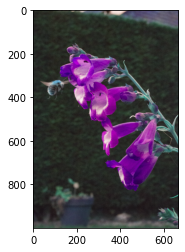

In [4]:
# fill in missing part
#img = mpimg.imread('../images/IMG_7438.jpg') # replace this code and load your image
img = cv2.imread('../images/IMG_7438.jpg')

# display the image
# display(img)
plt.imshow(img)

Play a bit with the image and understand how the images are represented in Python for example try:
- Printing the shape
- Try accessing image channels
- Display each channel separately
- Swap the channels and display the image

Do you notice any differences when you swap the channels? or visualized only one channel ata time?

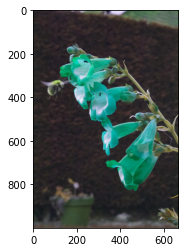

In [16]:
#show red channel
plt.imshow(img[...,0])

#show green channel
plt.imshow(img[...,1])

#show blue channel
plt.imshow(img[...,2])

#swap the channels
plt.imshow(img[...,[1,2,0]])

### 1.2 Convert to gray scale
`Hint: try using cvtColor from openCV packge`

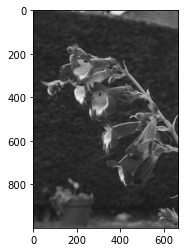

In [7]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # replace this code and load your image

# display the image
# display(gray_img)
plt.imshow(gray_img, 'gray')

Try writing your oen method to convert RGB images to gray scale.

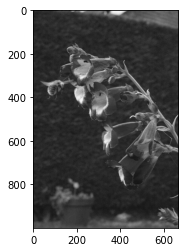

In [8]:
def to_gray(img):
    '''
    Convert and RGB image into gray scale
    :param img: RBG image with size HxWx3
    :return: gray scaled image of size HxW
    '''
    assert len(img.shape) == 3, f'Wrong input image dimensions, we expected an input of size HxWxC instead we got {img.shape}'
    h,w,c = img.shape
    gray_img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140]) # Modify this part to convert the image onto gray scale

    assert gray_img.shape == (h,w), 'Wrong spacial dimensions, your method should only change the channel dimension'
    return gray_img

gray_img = to_gray(img) # replace this code and load your image

# display the image
plt.imshow(gray_img, 'gray')

## More advanced basics
Now we have learned how to load and display images, and we have some information about how Python represent images we can do more advance image manipulations.

### 2.1 Transpose and 90 degrees rotate
Flip the image across its diagonal

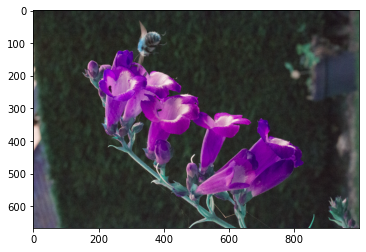

In [15]:
transposed_img = img.swapaxes(0,1)
plt.imshow(transposed_img)

### 2.2 Split the image
Split the image into four equal parts and display each of them.
You can display each of them separately or preferably in a single plot using `subplots`.

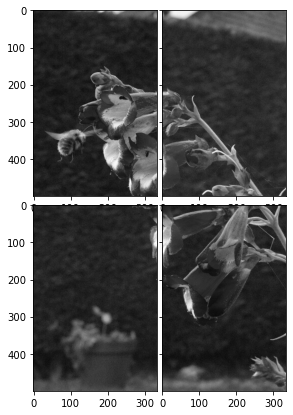

In [88]:
h,w = gray_img.shape
first_part = gray_img[0:h//2, 0:w//2]
second_part = gray_img[h//2:, 0:w//2]
third_part = gray_img[0:h//2, w//2:]
fourth_part = gray_img[h//2:, w//2:]

# display all parts
fig, axes = plt.subplots(2,2, figsize=(10,7), sharey=True)
fig.subplots_adjust(wspace=-0.7, hspace=0.05)

axes[0,0].imshow(first_part, 'gray')
axes[0,0].set_aspect('equal')

axes[1,0].imshow(second_part, 'gray')
axes[1,0].set_aspect('equal')

axes[0,1].imshow(third_part, 'gray')
axes[0,1].set_aspect('equal')

axes[1,1].imshow(fourth_part, 'gray')
axes[1,1].set_aspect('equal')

## Scaling and loops

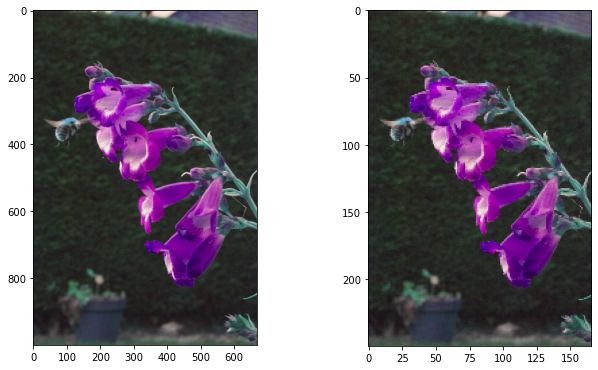

In [83]:
from typing import Union

def resize(img, scale: Union[float, int]) -> np.ndarray:
    """ Resize an image maintaining its proportions
    Args:
        fp (str): Path argument to image file
        scale (Union[float, int]): Percent as whole number of original image. eg. 53
    Returns:
        image (np.ndarray): Scaled image
    """
    _scale = lambda dim, s: int(dim * s / 100)
    height, width, channels = img.shape
    new_width: int = _scale(width, scale)
    new_height: int = _scale(height, scale)
    new_dim: tuple = (new_width, new_height)
    return cv2.resize(src=img, dsize=new_dim, interpolation=cv2.INTER_LINEAR)

scaled_img = img[:,:664,:]
scaled_img = resize(scaled_img, 25)

f = plt.figure(figsize=(10,7))
f.subplots_adjust(wspace=0.5)
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

# display original image
ax1.imshow(img)
# display scaled down image
ax2.imshow(scaled_img)

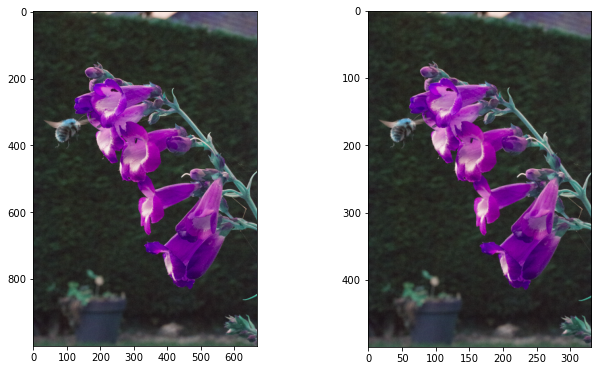

In [110]:
from sklearn.feature_extraction.image import check_array, _extract_patches, \
_compute_n_patches, check_random_state

def extract_patches_2d(image, patch_size, *, max_patches=None,
                       random_state=None):
    """Reshape a 2D image into a collection of patches

    The resulting patches are allocated in a dedicated array.

    Read more in the :ref:`User Guide <image_feature_extraction>`.

    Parameters
    ----------
    image : ndarray of shape (image_height, image_width) or \
        (image_height, image_width, n_channels)
        The original image data. For color images, the last dimension specifies
        the channel: a RGB image would have `n_channels=3`.

    patch_size : tuple of int (patch_height, patch_width)
        The dimensions of one patch.

    max_patches : int or float, default=None
        The maximum number of patches to extract. If `max_patches` is a float
        between 0 and 1, it is taken to be a proportion of the total number
        of patches.

    random_state : int, RandomState instance, default=None
        Determines the random number generator used for random sampling when
        `max_patches` is not None. Use an int to make the randomness
        deterministic.
        See :term:`Glossary <random_state>`.

    Returns
    -------
    patches : array of shape (n_patches, patch_height, patch_width) or \
        (n_patches, patch_height, patch_width, n_channels)
        The collection of patches extracted from the image, where `n_patches`
        is either `max_patches` or the total number of patches that can be
        extracted.
    """
    i_h, i_w = image.shape[:2]
    p_h, p_w = patch_size

    if p_h > i_h:
        raise ValueError("Height of the patch should be less than the height"
                         " of the image.")

    if p_w > i_w:
        raise ValueError("Width of the patch should be less than the width"
                         " of the image.")

    image = check_array(image, allow_nd=True)
    image = image.reshape((i_h, i_w, -1))
    n_colors = image.shape[-1]

    extracted_patches = _extract_patches(image,
                                         patch_shape=(p_h, p_w, n_colors),
                                         extraction_step=patch_size[0])

    n_patches = _compute_n_patches(i_h, i_w, p_h, p_w, max_patches)
    if max_patches:
        rng = check_random_state(random_state)
        i_s = rng.randint(i_h - p_h + 1, size=n_patches)
        j_s = rng.randint(i_w - p_w + 1, size=n_patches)
        patches = extracted_patches[i_s, j_s, 0]
    else:
        patches = extracted_patches

    patches = patches.squeeze()
    # remove the color dimension if useless
    if patches.shape[-1] == 1:
        return patches.reshape((n_patches, p_h, p_w))
    else:
        return patches

def average_scale_down(img):
    '''
    Scale down and RGB image
    :param img: RBG image with size HxWx3
    :return: scaled_img: RBG scaled down image with size (H/4)x(W/4)x3
    '''
    assert len(img.shape) == 3, f'Wrong input image dimensions, we expected an input of size HxWxC instead we got {img.shape}'
    h,w,c = img.shape
    patches = extract_patches_2d(img, (2,2))
    scaled_img = patches.mean((2,3))/255 # Modify this part to convert the image onto gray scale

    assert scaled_img.shape == (h//2,w//2, 3), f'Wrong spacial dimensions, your method should reduce the spacial dimensions by a factor of four we expect {(h//4,w//4, 3)} instead we have {scaled_img.shape}'
    return scaled_img

scaled_img = img[:,:664,:]
h,w,c = scaled_img.shape
scaled_img = average_scale_down(scaled_img)

f = plt.figure(figsize=(10,7))
f.subplots_adjust(wspace=0.5)
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

# display original image
ax1.imshow(img)
# display scaled down image
ax2.imshow(scaled_img)

Similarly, how can you double the size of an image?
What sort of artefacts are visible if you do so?
Try and code this out yourself.


### Advanced
Nested loops can take a lot of time you may already noticed, rewrite your scale down function without using loops.

`Hint: make use of extrcat 2d pathes in sklearn`
